# Importing required libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLS

Steps
1. Reading, understanding and visualising the data
2. Preparing the model for modeling (treain-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evalution on the test set

## Step 1.Reading and Understanding the Data

In [27]:
df = pd.read_csv(r"day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
# size of the df
df.shape

(730, 16)

In [29]:
#checking if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [30]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [31]:
#numeric variables in the dataset
df_numeric = df[['temp','atemp','hum','windspeed','cnt']]
df_numeric

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


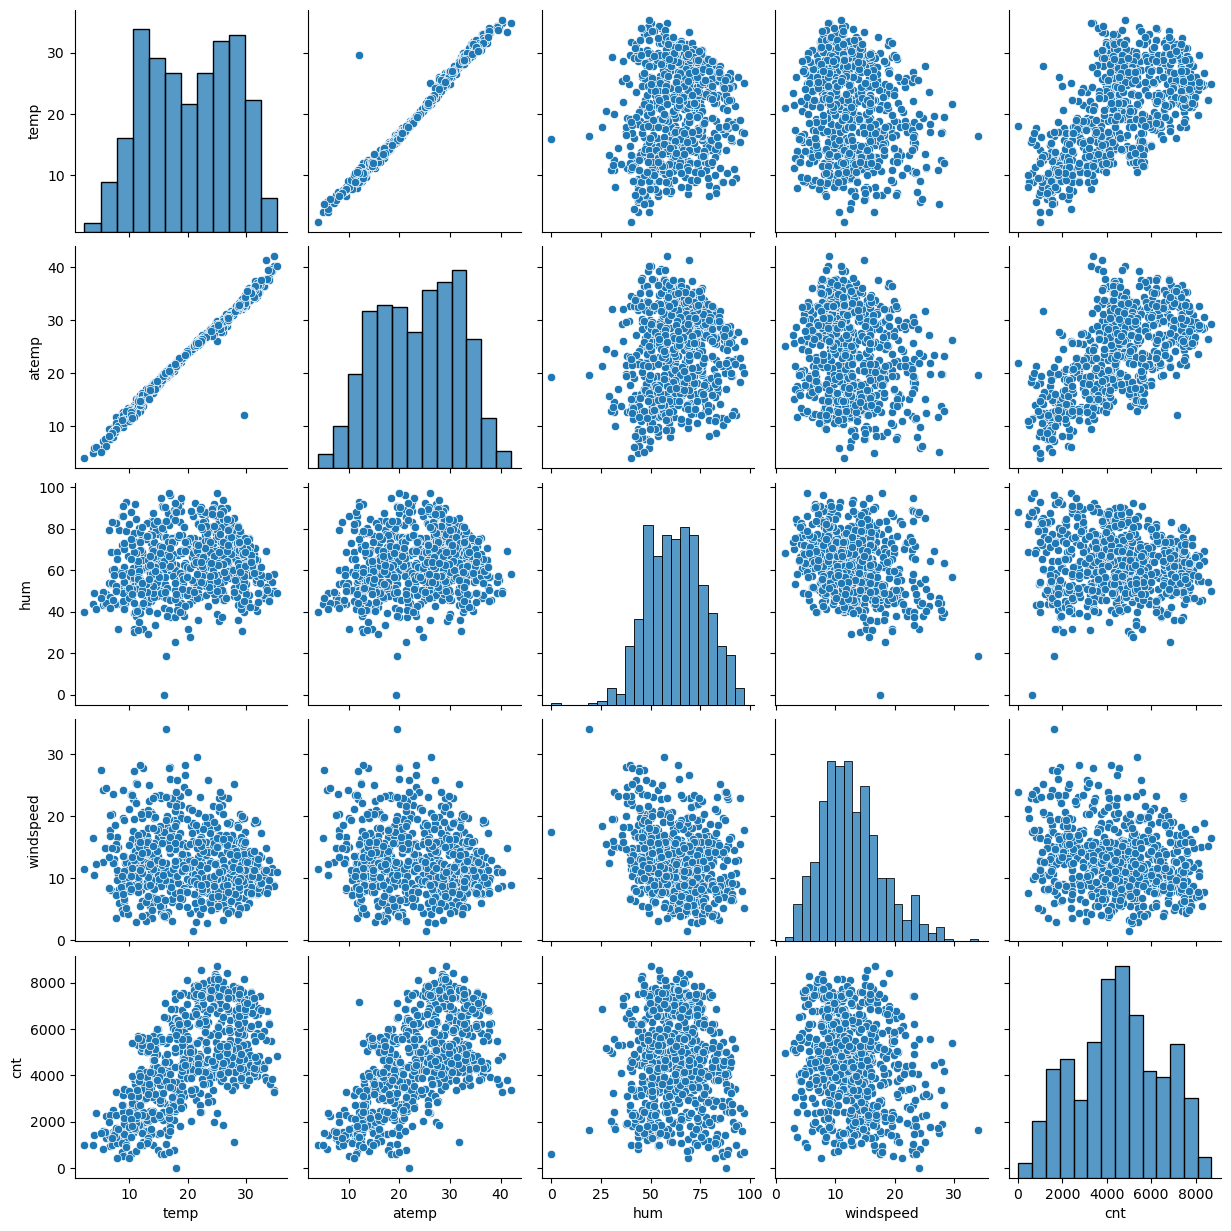

In [32]:
# visualising the numeric variables
sns.pairplot(df_numeric)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

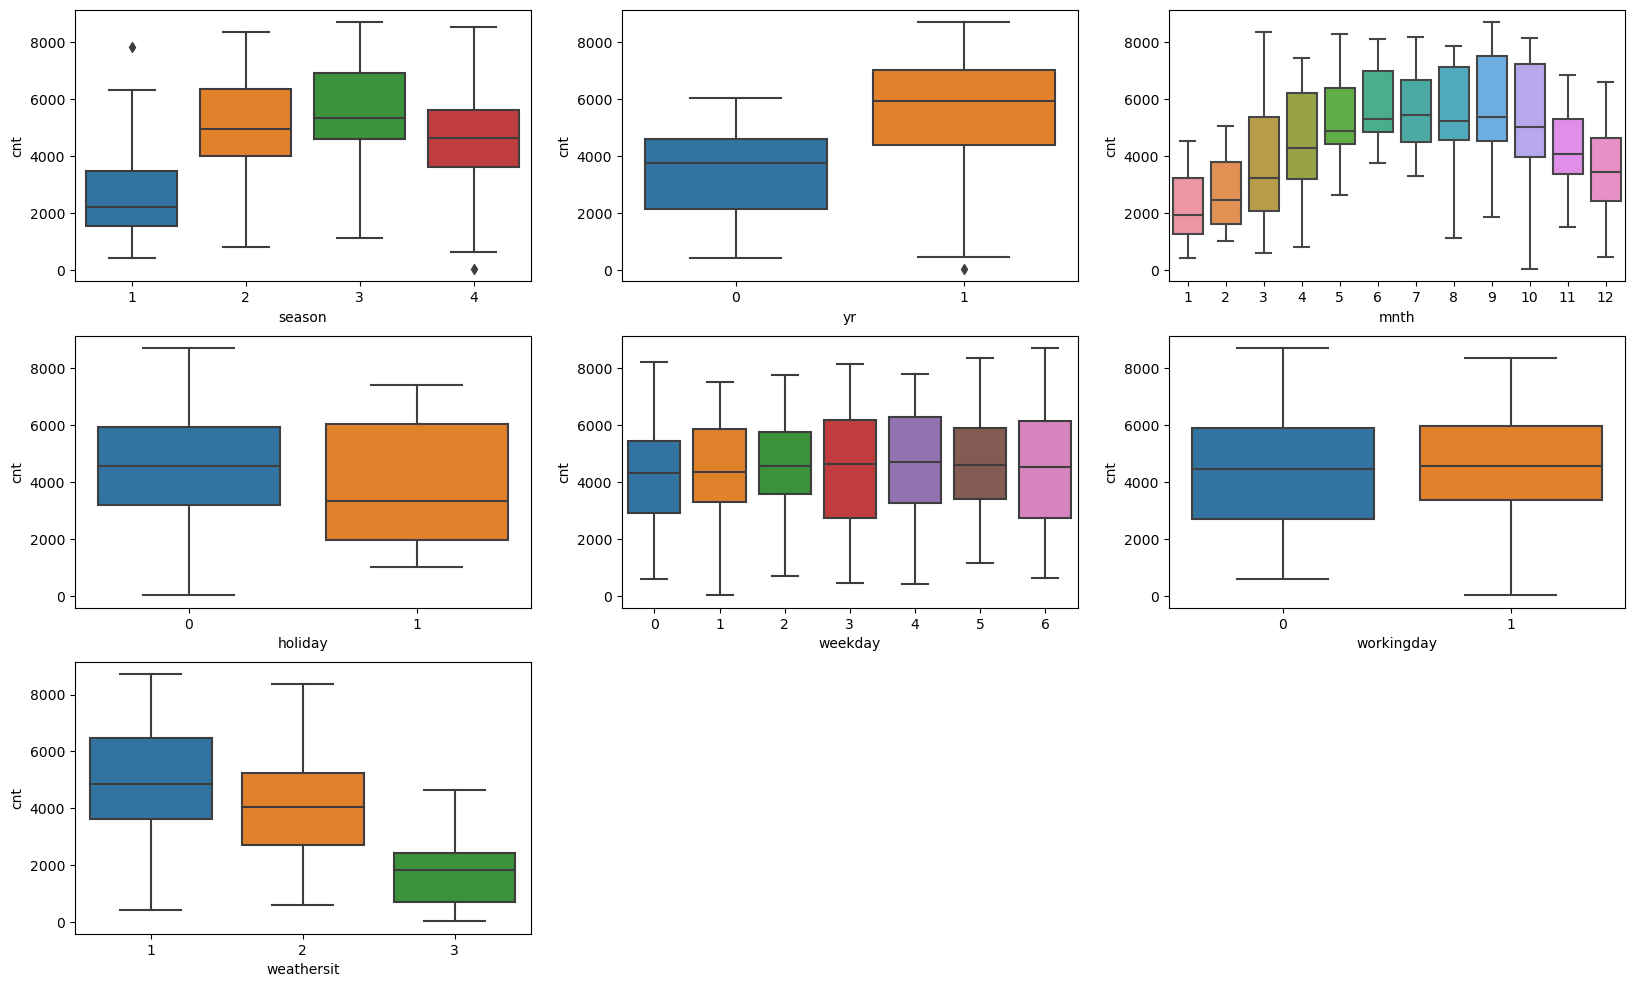

In [33]:
# visualising the categorial variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=df)

## 2. Preparing the Model for Modeling 

In [34]:
# Categorical variables to dummy variables
# for season, 1:spring, 2:summer, 3:fall, 4:winter
season_dummy = pd.get_dummies(df['season'], drop_first=True)
season_dummy.rename(columns= { 2: 'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
season_dummy

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [35]:
# concat the season_dummy with the df
df = pd.concat([df, season_dummy], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [36]:
#Dropping variables- instant, season, casual, registered, dteday
df = df.drop(['instant','season','casual','registered','dteday'], axis=1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [37]:
# for holiday variable
holiday_dummy = pd.get_dummies(df['holiday'], drop_first=True)
holiday_dummy.rename(columns= { 1: 'holiday_yes'}, inplace=True)
holiday_dummy

,holiday_yes
0,0
1,0
2,0
3,0
4,0
...,...
725,0
726,0
727,0
728,0


In [38]:
df = pd.concat([df, holiday_dummy], axis=1)
df = df.drop(['holiday'], axis=1)
df.head()

,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,holiday_yes
0,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0
1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0
2,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0
3,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0
4,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0


In [39]:
#for month variable
month_dummy = pd.get_dummies(df['mnth'], drop_first=True)
month_dummy.rename(columns= { 2 : 'Feb', 3:'March', 4:'April', 5: 'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept',10: 'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
month_dummy

,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df = pd.concat([df, month_dummy], axis=1)
df = df.drop(['mnth'], axis=1)
df.head()

,yr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,...,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#for workingday variable
workingday_dummy = pd.get_dummies(df['workingday'], drop_first=True)
workingday_dummy.rename(columns= { 1 : 'workingday_yes'}, inplace=True)
workingday_dummy

,workingday_yes
0,0
1,0
2,1
3,1
4,1
...,...
725,1
726,1
727,0
728,0


In [42]:
df = pd.concat([df, workingday_dummy], axis=1)
df = df.drop(['workingday'], axis=1)
df.head()

,yr,weekday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,April,May,June,July,Aug,Sept,Oct,Nov,Dec,workingday_yes
0,0,6,2,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#for weathersit variable
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_dummy.rename(columns= { 2 : 'Mist', 3: 'LightSnow'}, inplace=True)
weathersit_dummy

,Mist,LightSnow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [44]:
df = pd.concat([df, weathersit_dummy], axis=1)
df = df.drop(['weathersit'], axis=1)
df.head()

,yr,weekday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,...,June,July,Aug,Sept,Oct,Nov,Dec,workingday_yes,Mist,LightSnow
0,0,6,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,2,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#for weathersit variable
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)
weekday_dummy.rename(columns= { 1 : 'Mon', 2: 'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}, inplace=True)
weekday_dummy

,Mon,Tues,Wed,Thur,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [46]:
df = pd.concat([df, weekday_dummy], axis=1)
df = df.drop(['weekday'], axis=1)
df.head()

,yr,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,holiday_yes,...,Dec,workingday_yes,Mist,LightSnow,Mon,Tues,Wed,Thur,Fri,Sat
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [47]:
df.shape

(730, 30)

In [48]:
df.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Summer', 'Fall',
       'Winter', 'holiday_yes', 'Feb', 'March', 'April', 'May', 'June', 'July',
       'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'workingday_yes', 'Mist',
       'LightSnow', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'],
      dtype='object')

### Splitting into train and test


In [49]:
#Splitting the dataset into train and test data
df_train, df_test = train_test_split(df, train_size = 0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescaling the Features

In [50]:
#Min-Max scaling (normalisation)
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
num_vars

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,holiday_yes,...,Dec,workingday_yes,Mist,LightSnow,Mon,Tues,Wed,Thur,Fri,Sat
367,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
648,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
44,0,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
705,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
379,1,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.545191,0.530558,0.653714,0.294764,0.522837
75%,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Model Building

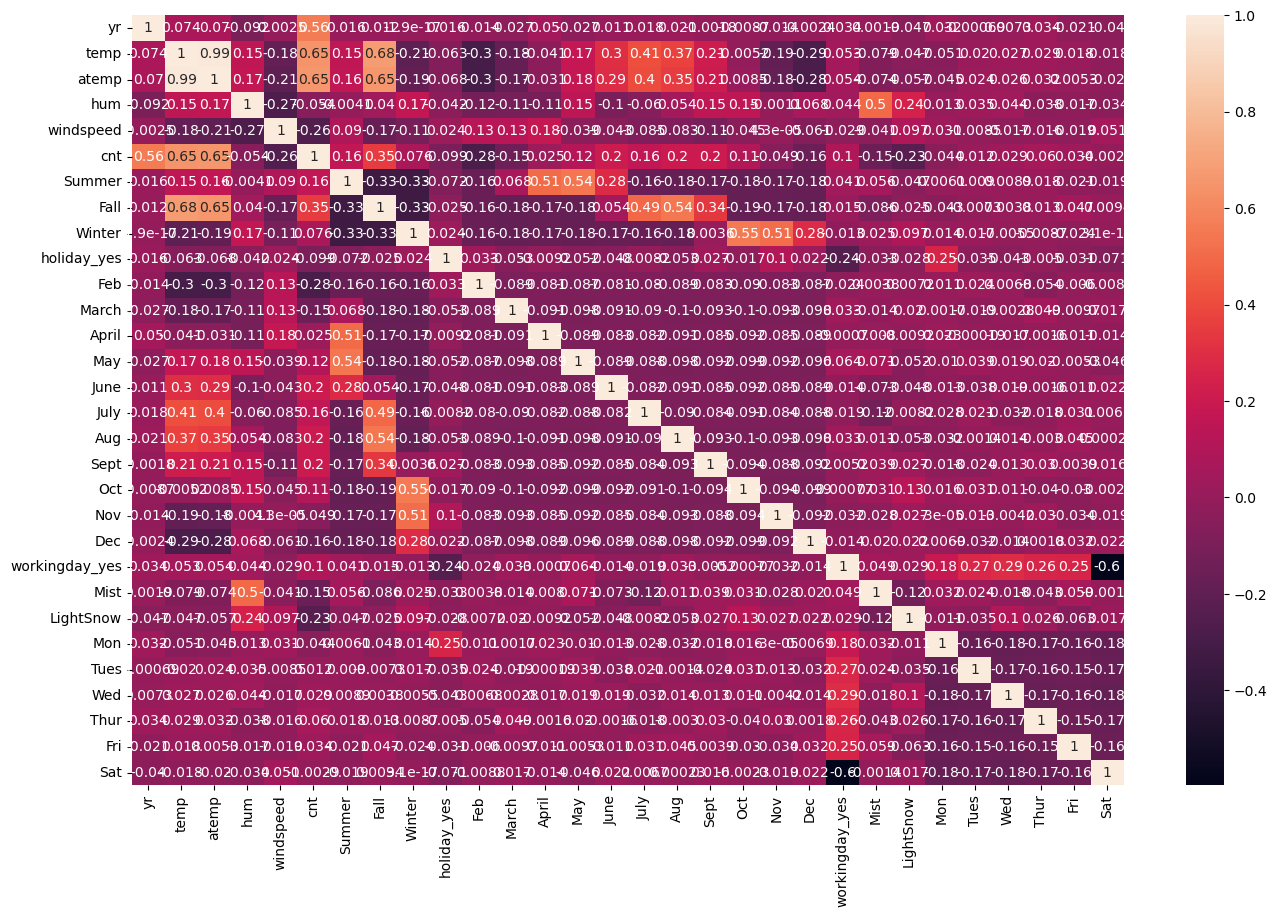

In [53]:
#Checking the correlation of the variables with each other
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [54]:
#Splitting the x_train and y_train data
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

## Recursive feature elimination(RFE)

In [62]:
#Using RFE to build the model
rfe = RFE(lr_model)
rfe = rfe.fit(X_train,y_train)

In [63]:
list(zip(rfe.feature_names_in_,rfe.ranking_,rfe.support_))

[('yr', 1, True),
 ('temp', 1, True),
 ('atemp', 2, False),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('Summer', 1, True),
 ('Fall', 3, False),
 ('Winter', 1, True),
 ('holiday_yes', 1, True),
 ('Feb', 8, False),
 ('March', 4, False),
 ('April', 7, False),
 ('May', 5, False),
 ('June', 6, False),
 ('July', 9, False),
 ('Aug', 1, True),
 ('Sept', 1, True),
 ('Oct', 1, True),
 ('Nov', 13, False),
 ('Dec', 14, False),
 ('workingday_yes', 1, True),
 ('Mist', 1, True),
 ('LightSnow', 1, True),
 ('Mon', 10, False),
 ('Tues', 11, False),
 ('Wed', 15, False),
 ('Thur', 16, False),
 ('Fri', 12, False),
 ('Sat', 1, True)]

In [64]:
#to check how many variables are supported by RFE
len([i for i in rfe.support_ if i==True])

14

In [65]:
selected_feature = X_train.columns[rfe.support_]
selected_feature

Index(['yr', 'temp', 'hum', 'windspeed', 'Summer', 'Winter', 'holiday_yes',
       'Aug', 'Sept', 'Oct', 'workingday_yes', 'Mist', 'LightSnow', 'Sat'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov',
       'Dec', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri'],
      dtype='object')

## VIF calculation

In [71]:
#calculation the vif
def calculation_of_vif(d):
    vif = pd.DataFrame()
    vif['Features'] = d.columns
    vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by= 'VIF', ascending=False)
    return vif

In [72]:
X_train_selected_feature_ref = X_train[selected_feature]

In [74]:
calculation_of_vif(X_train_selected_feature_ref)

,Features,VIF
2,hum,16.33
1,temp,10.07
10,workingday_yes,4.84
3,windspeed,3.85
5,Winter,2.31
11,Mist,2.14
0,yr,2.03
4,Summer,1.86
13,Sat,1.85
9,Oct,1.69


## Checking Errors in Builded LR Model using states

In [75]:
X_train_const_ols = sm.add_constant(X_train_selected_feature_ref)
lr_ols = sm.OLS(y_train, X_train_const_ols).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.77e-226
Time:                        16:26:38   Log-Likelihood:                 602.30
No. Observations:                 584   AIC:                            -1175.
Df Residuals:                     569   BIC:                            -1109.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1817      0.026      6.859      0.000       0.130       0.234
yr                 0.2256      0.007     30.749      0.000       0.211       0.240
temp               0.5439      0.020     26.868      0.000       0.504       0.584
hum               -0.1691      0.035     -4.875      0.000      -0.237      -0.101
windspeed         -0.1856      0.023     -7.922      0.000      -0.232      -0.140
Summer             0.1077      0.010     10.828      0.000       0.088       0.127
Winter             0.1349      0.011     12.226      0.000       0.113       0.157
holiday_yes       -0.0572      0.024     -2.400      0.017      -0.104      -0.010
Aug                0.0558      0.015      3.692      0.000       0.026       0.086
Sept               0.1208      0.015      8.133      0.000       0.092       0.150
Oct                0.0502      0.016      3.233      0.001       0.020       0.081
workingday_yes     0.0509      0.010      4.961      0.000       0.031       0.071
Mist              -0.0565      0.010     -5.871      0.000      -0.075      -0.038
LightSnow         -0.2528      0.025    -10.217      0.000      -0.301      -0.204
Sat                0.0603      0.013      4.582      0.000       0.034       0.086
==============================================================================
Omnibus:                       87.568   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.454
Skew:                          -0.770   Prob(JB):                     4.95e-49
Kurtosis:                       5.602   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Dropping variable holiday_yes
X_train_ols1 = X_train_const_ols.drop(['holiday_yes'],axis=1)
calculation_of_vif(X_train_ols1)

,Features,VIF
0,const,52.47
3,hum,1.91
6,Winter,1.75
11,Mist,1.60
2,temp,1.59
10,workingday_yes,1.58
13,Sat,1.57
9,Oct,1.55
7,Aug,1.44
5,Summer,1.40


In [78]:
X_train_ols1 = sm.add_constant(X_train_ols1)
lr_ols1 = sm.OLS(y_train,X_train_ols1).fit()
lr_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     251.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.98e-226
Time:                        16:29:43   Log-Likelihood:                 599.36
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     570   BIC:                            -1110.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1722      0.026      6.547      0.000       0.121       0.224
yr                 0.2252      0.007     30.580      0.000       0.211       0.240
temp               0.5446      0.020     26.794      0.000       0.505       0.585
hum               -0.1679      0.035     -4.823      0.000      -0.236      -0.100
windspeed         -0.1871      0.024     -7.955      0.000      -0.233      -0.141
Summer             0.1092      0.010     10.950      0.000       0.090       0.129
Winter             0.1347      0.011     12.154      0.000       0.113       0.156
Aug                0.0572      0.015      3.769      0.000       0.027       0.087
Sept               0.1201      0.015      8.051      0.000       0.091       0.149
Oct                0.0513      0.016      3.290      0.001       0.021       0.082
workingday_yes     0.0594      0.010      6.140      0.000       0.040       0.078
Mist              -0.0565      0.010     -5.845      0.000      -0.075      -0.038
LightSnow         -0.2521      0.025    -10.150      0.000      -0.301      -0.203
Sat                0.0689      0.013      5.419      0.000       0.044       0.094
==============================================================================
Omnibus:                       92.597   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.727
Skew:                          -0.804   Prob(JB):                     5.33e-53
Kurtosis:                       5.703   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
lr_ols1.pvalues

const              1.308359e-10
yr                2.771498e-122
temp              5.674609e-103
hum                1.821184e-06
windspeed          9.688637e-15
Summer             1.870354e-25
Winter             2.188749e-30
Aug                1.812065e-04
Sept               4.807202e-15
Oct                1.062776e-03
workingday_yes     1.544772e-09
Mist               8.552682e-09
LightSnow          2.310388e-22
Sat                8.867568e-08
dtype: float64

In [80]:
lr_ols1.params

const             0.172232
yr                0.225227
temp              0.544634
hum              -0.167935
windspeed        -0.187121
Summer            0.109210
Winter            0.134690
Aug               0.057180
Sept              0.120085
Oct               0.051289
workingday_yes    0.059441
Mist             -0.056509
LightSnow        -0.252147
Sat               0.068935
dtype: float64

In [83]:
y_train_predict = lr_ols1.predict(X_train_ols1)
y_train_predict

367    0.312126
648    0.761744
44     0.257045
705    0.544922
379    0.313842
         ...   
578    0.835466
53     0.247974
350    0.276679
79     0.309596
520    0.663076
Length: 584, dtype: float64

# Step 4. Residual analysis

Text(0.5, 0, 'Errors')

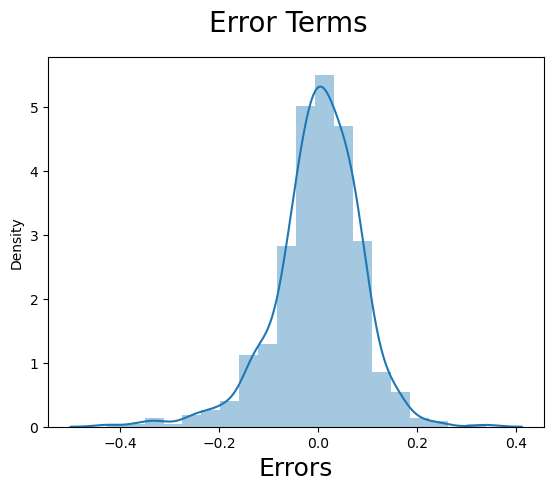

In [84]:
#Normality of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [85]:
calculation_of_vif(X_train_ols1)

,Features,VIF
0,const,52.47
3,hum,1.91
6,Winter,1.75
11,Mist,1.60
2,temp,1.59
10,workingday_yes,1.58
13,Sat,1.57
9,Oct,1.55
7,Aug,1.44
5,Summer,1.40


<Axes: >

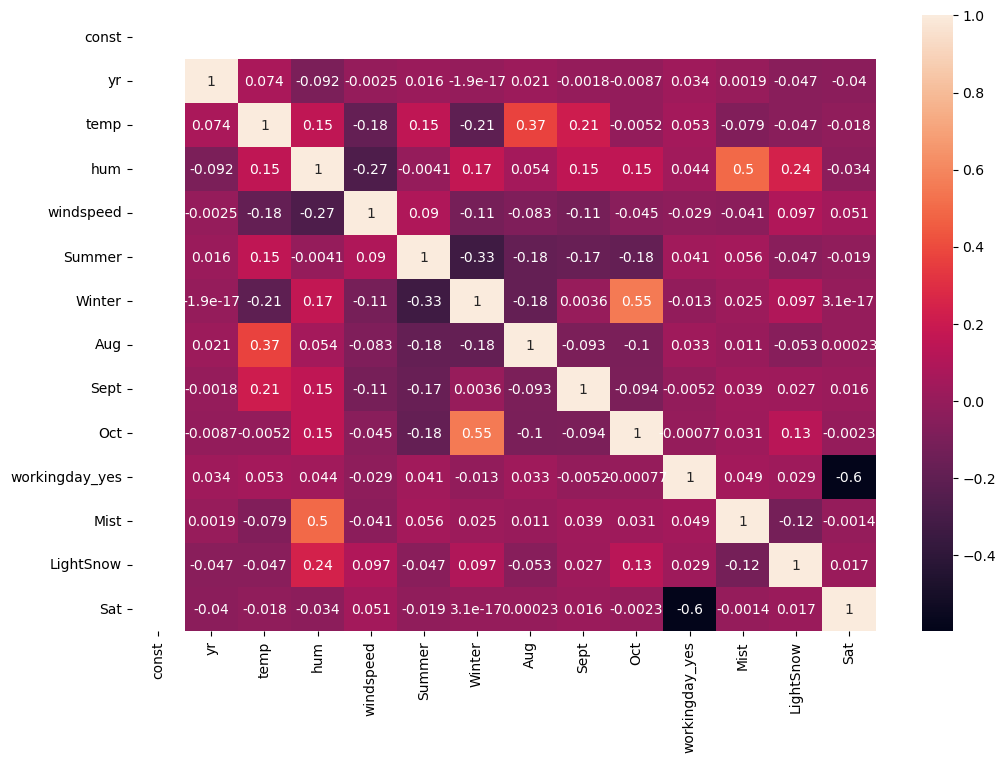

In [86]:
#Multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(X_train_ols1.corr(),annot = True)

367   -0.057409
648    0.106641
44    -0.039489
705    0.028709
379   -0.050497
         ...   
578   -0.002632
53    -0.029958
350    0.035907
79    -0.073172
520    0.139846
Length: 584, dtype: float64


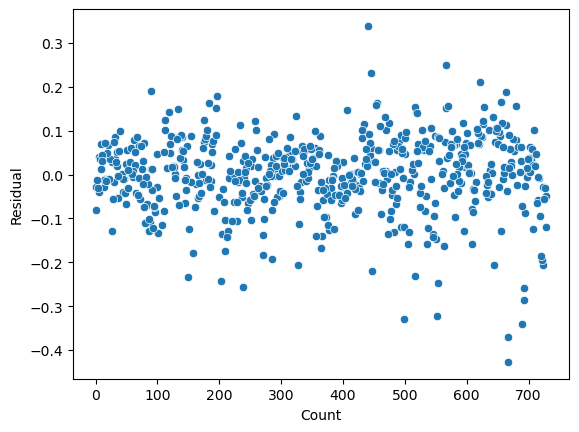

In [87]:
#Homoscedasticity of Residuals
y_train_prediction_1 = lr_ols1.predict(X_train_ols1)
residual = y_train - y_train_prediction_1
print(residual)
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [88]:
#Scaling for test dataset
num_vars = ['temp','atemp','hum','windspeed','cnt']
num_vars

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,holiday_yes,...,Dec,workingday_yes,Mist,LightSnow,Mon,Tues,Wed,Thur,Fri,Sat
184,0,0.837241,0.778767,0.534223,0.150577,0.701863,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
535,1,0.911423,0.855132,0.470417,0.232972,0.723159,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
299,0,0.496221,0.492359,0.777843,0.446910,0.272912,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
221,0,0.890387,0.805661,0.236659,0.453268,0.541767,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
152,0,0.821739,0.749249,0.070765,0.687792,0.565598,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [89]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
col = list(X_train_ols1.columns)
# col1 = list(col1).remove('const')
print(col.remove('const'))
X_test = X_test[col]

X_test_lm = sm.add_constant(X_test)
y_pred = lr_ols1.predict(X_test_lm)
r2 = r2_score(y_test, y_pred)
round(r2,4)

None


0.7704

# Step 5: Model Evalution

Text(0, 0.5, 'y_pred')

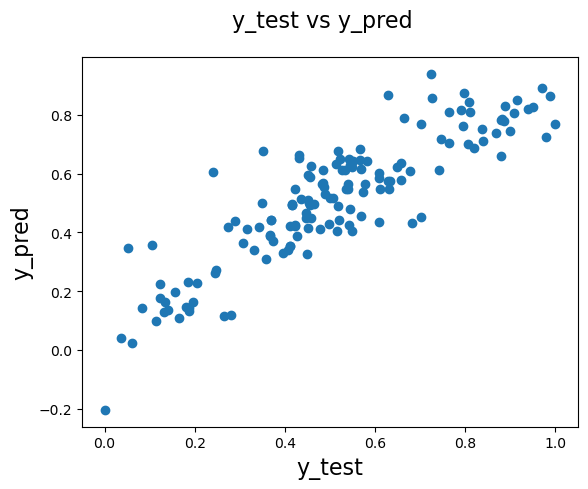

In [93]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16) 

In [94]:
round(lr_ols1.params,4)

const             0.1722
yr                0.2252
temp              0.5446
hum              -0.1679
windspeed        -0.1871
Summer            0.1092
Winter            0.1347
Aug               0.0572
Sept              0.1201
Oct               0.0513
workingday_yes    0.0594
Mist             -0.0565
LightSnow        -0.2521
Sat               0.0689
dtype: float64

In [95]:
#calculating adjusted_r2 for test data
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7478


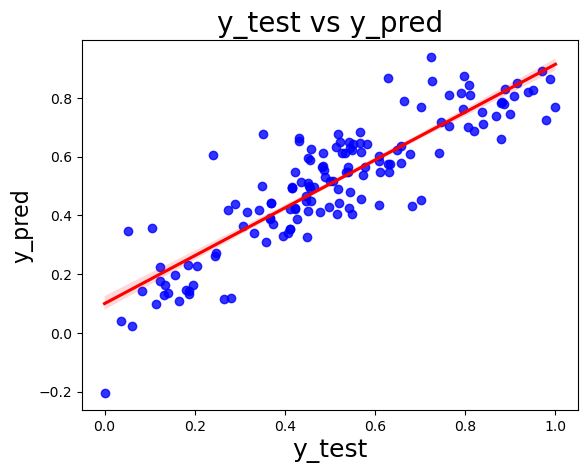

In [98]:
#plotting y_test anf y_pred
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()